In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path='/Users/paw_paw/Library/Mobile Documents/com~apple~CloudDocs/学习/PC5287_M.SC Coursework Thesis for Physics And Technology/data set'

In [4]:
T_OUT_2019=pd.read_csv(path+'/Total_flux_2019.csv').sort_values(by='TOTAL',ascending=False,ignore_index=True)
T_OUT_2020=pd.read_csv(path+'/Total_flux_2020.csv').sort_values(by='TOTAL',ascending=False,ignore_index=True)

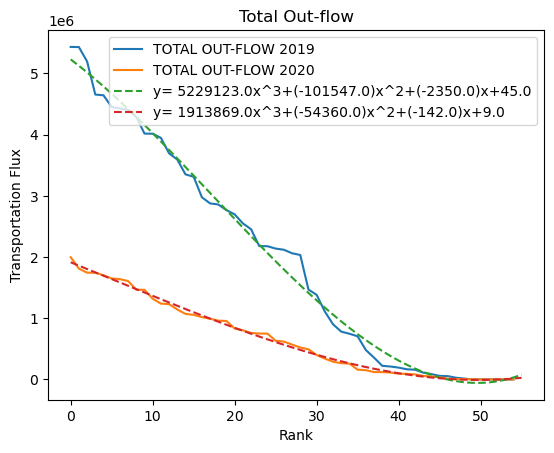

In [5]:
# show the total out-flow gragh (same origin)
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    T_OUT_2019_fit=np.poly1d(np.polyfit(range(0,55), T_OUT_2019['TOTAL'],3))
    T_OUT_2020_fit=np.poly1d(np.polyfit(range(0,55), T_OUT_2020['TOTAL'],3))

plt.plot(T_OUT_2019['TOTAL'],label='TOTAL OUT-FLOW 2019')
plt.plot(T_OUT_2020['TOTAL'],label='TOTAL OUT-FLOW 2020')
x=np.linspace(0,55,1000)
plt.plot(x,T_OUT_2019_fit(x),'--', label= f"y= {np.around(T_OUT_2019_fit[0])}x^3+({np.around(T_OUT_2019_fit[1])})x^2+({np.around(T_OUT_2019_fit[2])})x+{np.around(T_OUT_2019_fit[3])}")
plt.plot(x,T_OUT_2020_fit(x),'--', label=f"y= {np.around(T_OUT_2020_fit[0])}x^3+({np.around(T_OUT_2020_fit[1])})x^2+({np.around(T_OUT_2020_fit[2])})x+{np.around(T_OUT_2020_fit[3])}")
plt.xlabel('Rank')
plt.ylabel('Transportation Flux')
plt.title('Total Out-flow')
plt.legend()
plt.show()

In [6]:
T_ij_2019=pd.read_csv(path+'/Total_flux_ij_2019.csv',index_col='PA_name')
T_ij_2020=pd.read_csv(path+'/Total_flux_ij_2020.csv',index_col='PA_name')

In [7]:
# show the total in-flow graph (same destination)
T_IN_2019=T_OUT_2019
T_IN_2020=T_OUT_2020

In [8]:
T_IN_2019['TOTAL']=(T_ij_2019.sum(axis=0)-np.diagonal(T_ij_2019)).sort_values(ascending=False,ignore_index=True)
T_IN_2020['TOTAL']=(T_ij_2020.sum(axis=0)-np.diagonal(T_ij_2020)).sort_values(ascending=False,ignore_index=True)

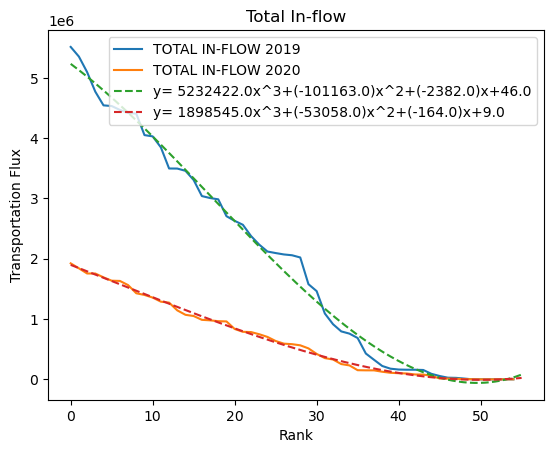

In [9]:
# show the i to j total flux of the same i
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    T_IN_2019_fit=np.poly1d(np.polyfit(range(0,55), T_IN_2019['TOTAL'],3))
    T_IN_2020_fit=np.poly1d(np.polyfit(range(0,55), T_IN_2020['TOTAL'],3)
)

plt.plot(T_IN_2019['TOTAL'],label='TOTAL IN-FLOW 2019')
plt.plot(T_IN_2020['TOTAL'],label='TOTAL IN-FLOW 2020')
x=np.linspace(0,55,1000)
plt.plot(x,T_IN_2019_fit(x),'--', label= f"y= {np.around(T_IN_2019_fit[0])}x^3+({np.around(T_IN_2019_fit[1])})x^2+({np.around(T_IN_2019_fit[2])})x+{np.around(T_IN_2019_fit[3])}")
plt.plot(x,T_IN_2020_fit(x),'--', label=f"y= {np.around(T_IN_2020_fit[0])}x^3+({np.around(T_IN_2020_fit[1])})x^2+({np.around(T_IN_2020_fit[2])})x+{np.around(T_IN_2020_fit[3])}")
plt.xlabel('Rank')
plt.ylabel('Transportation Flux')
plt.title('Total In-flow')
plt.legend()
plt.show()

In [10]:
Prediction_2019=pd.read_csv(path+'/Prediction2019_gpr.csv')
Prediction_2019.set_index('PA_name',inplace=True)

In [11]:
Prediction_2020=pd.read_csv(path+'/Prediction2020_gpr.csv')
Prediction_2020.set_index('PA_name',inplace=True)

In [12]:
data = np.sort(Prediction_2019.replace([np.inf, -np.inf], np.nan, inplace=False).to_numpy().flatten())
data=data[~np.isnan(data)]
data

array([      0. ,       0. ,       0. , ..., 2597983.5, 2715451. ,
       2716669. ])

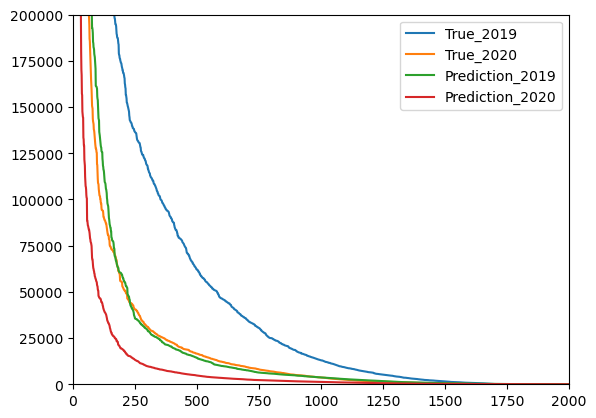

In [13]:
plt.plot(np.sort(T_ij_2019.replace([np.inf, -np.inf], np.nan, inplace=False).dropna().to_numpy().flatten())[::-1],label='True_2019')
plt.plot(np.sort(T_ij_2020.replace([np.inf, -np.inf], np.nan, inplace=False).dropna().to_numpy().flatten())[::-1],label='True_2020')
plt.plot(np.sort(Prediction_2019.replace([np.inf, -np.inf], np.nan, inplace=False).dropna().to_numpy().flatten())[::-1],label='Prediction_2019')
plt.plot(np.sort(Prediction_2020.replace([np.inf, -np.inf], np.nan, inplace=False).dropna().to_numpy().flatten())[::-1],label='Prediction_2020')
plt.xlim(0,2000)
plt.ylim(0,200000)
plt.legend()
plt.show()

In [14]:
import networkx as nx
G_2019 = nx.DiGraph()
G_2020 = nx.DiGraph()

In [15]:
# Also define a function to delete the diagram of the matrix 
def remove_diag(x):
    for i in range(0,T_ij_2019.shape[0]):
        x.iat[i,i]=None
    return x

In [16]:
# creat a dataframe to store the edges
edge_2019=pd.DataFrame()
edge_2019['ORIGIN']=T_ij_2019.columns.to_numpy().repeat(55)
edge_2019['DESTINATION']=T_ij_2019.index.to_numpy().reshape(1,55).repeat(55,axis=0).flatten()
edge_2019['WEIGHT']=np.empty(55*55)
for i in range(0,55):
    for j in range(0,55):
        edge_2019.at[i*55+j,'WEIGHT']=T_ij_2019.iat[i,j]
edge_2019.dropna(inplace=True)
G_2019=nx.from_pandas_edgelist(edge_2019, source='ORIGIN', target='DESTINATION', create_using=nx.DiGraph(),edge_attr=['WEIGHT'])

In [17]:
import geopandas as gpd

In [18]:
pos=pd.read_csv(path +'/centroid_pa.csv', index_col='PLN_AREA_N')['geometry'].to_dict()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

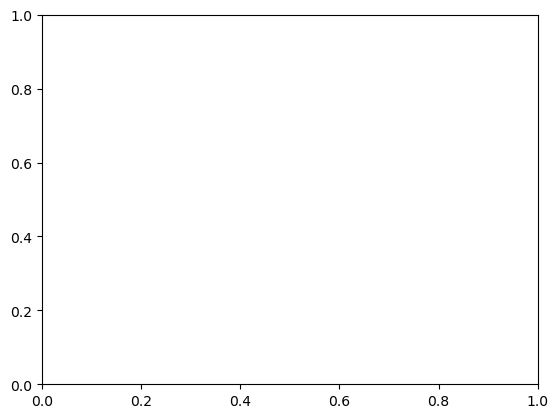

In [19]:
nx.draw_networkx_nodes(
    G_2019,
    pos,
    node_size=80,
    cmap=plt.cm.Reds_r,
)

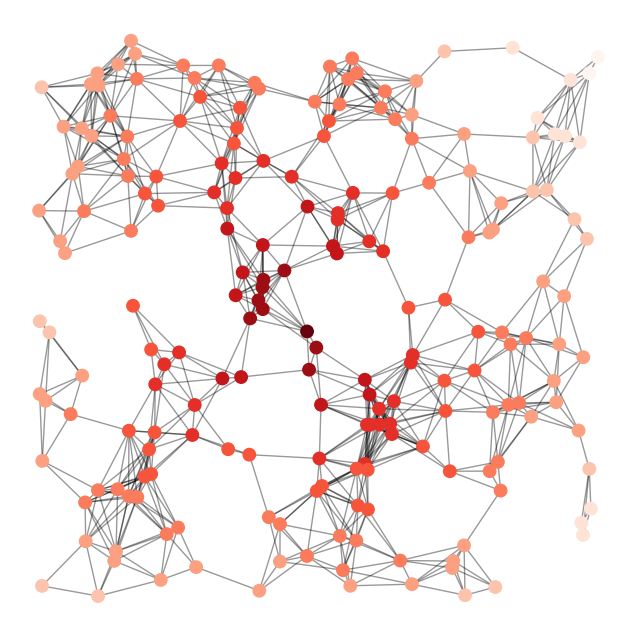

In [ ]:
# Use seed when creating the graph for reproducibility
G = nx.random_geometric_graph(200, 0.125, seed=896803)
# position is stored as node attribute data for random_geometric_graph
pos = nx.get_node_attributes(G, "pos")

# find node near center (0.5,0.5)
dmin = 1
ncenter = 0
for n in pos:
    x, y = pos[n]
    d = (x - 0.5) ** 2 + (y - 0.5) ** 2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))

plt.figure(figsize=(8, 8))
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(
    G,
    pos,
    nodelist=list(p.keys()),
    node_size=80,
    node_color=list(p.values()),
    cmap=plt.cm.Reds_r,
)

plt.xlim(-0.05, 1.05)
plt.ylim(-0.05, 1.05)
plt.axis("off")
plt.show()

In [ ]:
type(pos.get('BUKIT MERAH'))

str